In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import some relative libraries
import pandas as pd
import numpy as np
import math
from numbers import Number
from scipy import stats

from sklearn.base import BaseEstimator, TransformerMixin


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline




In [3]:
#load in the data from an excel file and save in a pandas dataset
#preview the data
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
#check for data types and see if information is missing
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
#column information and dataset taken from
#https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
#column information
"""
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
"""

'\n1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\n2.) Perimeter (P): Bean circumference is defined as the length of its border.\n3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.\n4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.\n5.) Aspect ratio (K): Defines the relationship between L and l.\n6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.\n7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\n8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.\n9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\n10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.\n11.)Roundness (R): Calculated with the 

In [6]:
bean_df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [7]:
bean_df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [8]:
#lambda function creating column showing if instance is or isn't the target bean
bean_df['Dermason']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 
bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  \
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER   
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER   
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER   
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER   
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER   

   Dermason  
0         0  
1         0  
2         0  
3         0  
4         0

In [9]:
#check to make sure this new Dermason column proportion matches the above proportion
bean_df['Dermason'].value_counts(normalize=True)

Dermason
0    0.739475
1    0.260525
Name: proportion, dtype: float64

In [10]:
#assign the independent variable columns
X= bean_df.drop(['Dermason','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

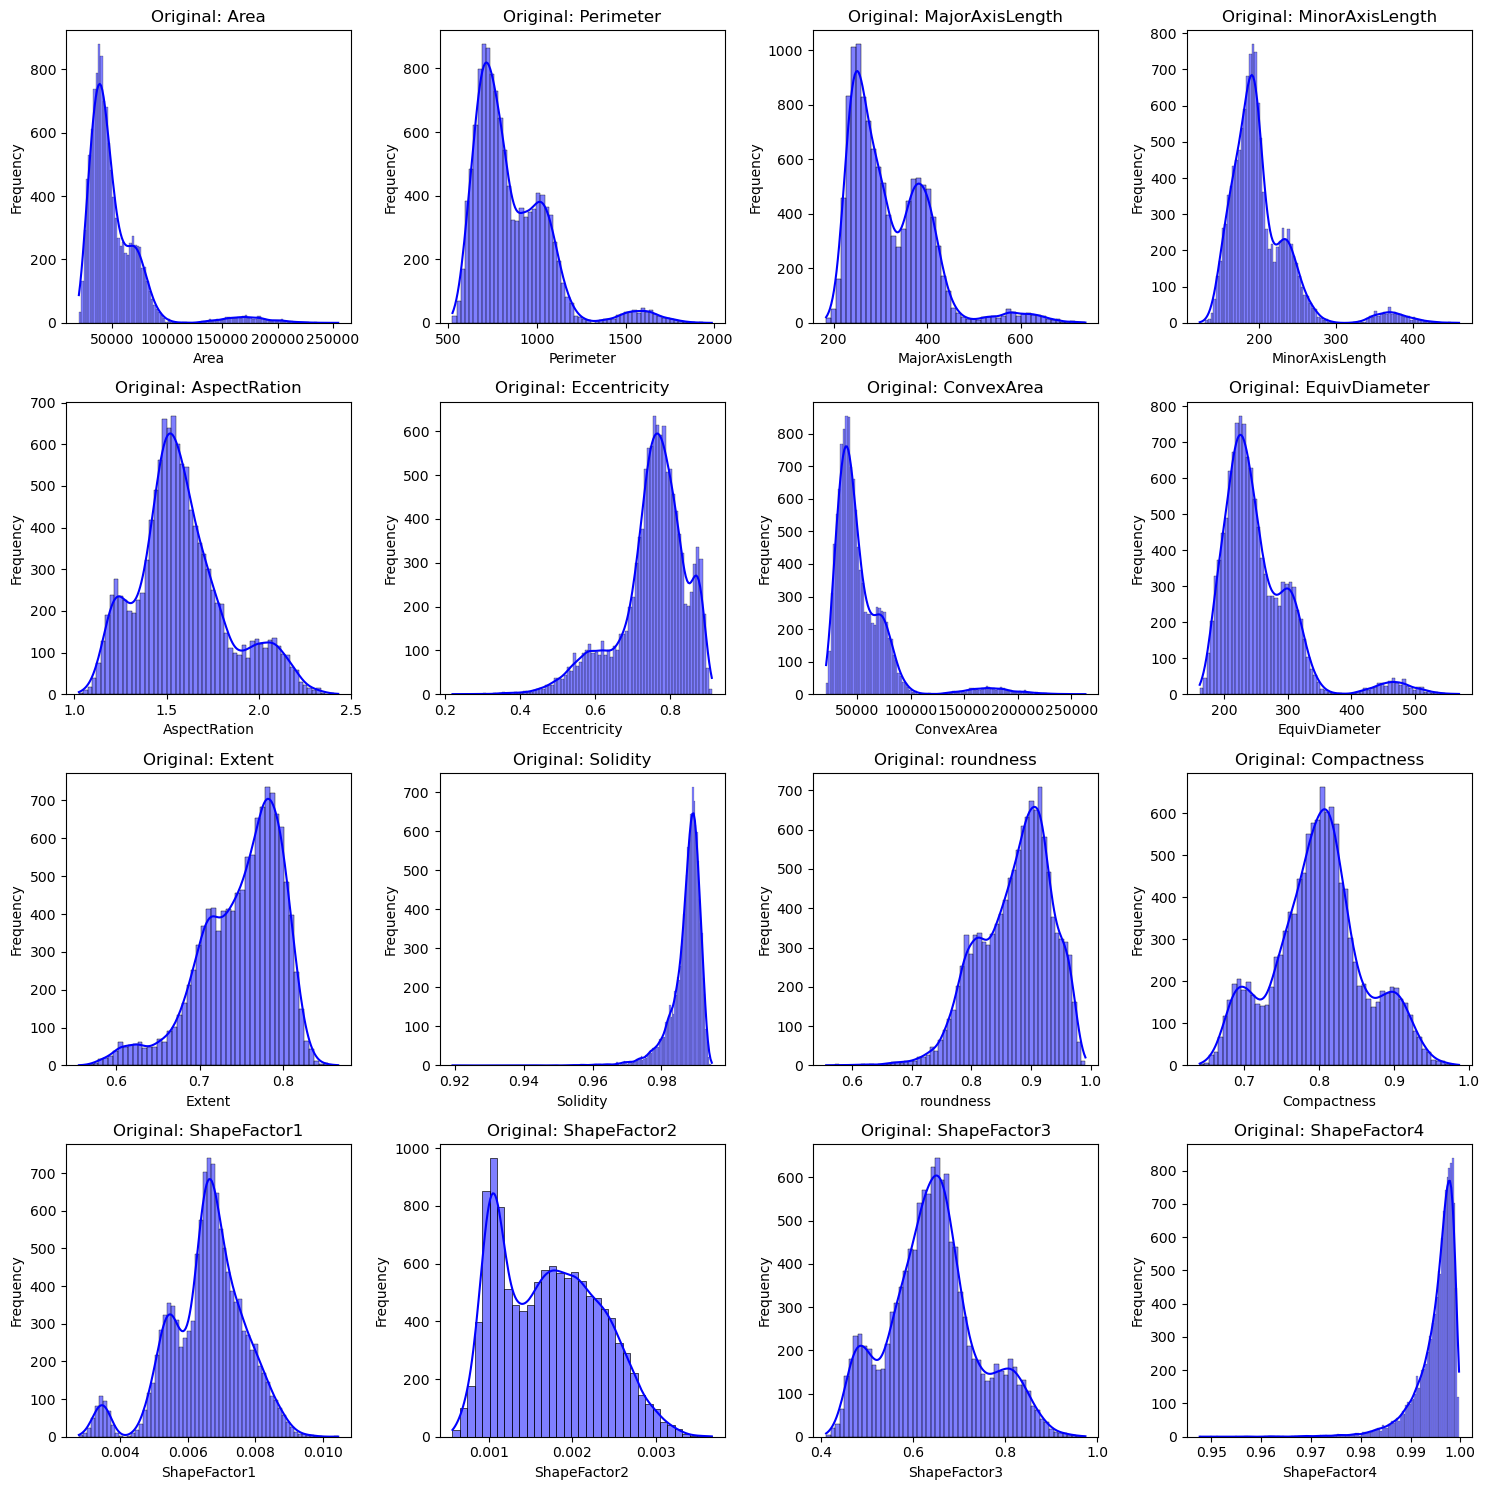

In [11]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

some of the data distrobutions are skewed. lets see if we can fix that.

In [12]:
def TransShift(df):
    
    LogT = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
            'EquivDiameter', 'ShapeFactor2']

    BoxCoxT = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

    Redist = pd.DataFrame()

    for col in df.columns:

        if col in LogT:
            Redist[col] = np.log1p(df[col])

        elif col in BoxCoxT:
            min_val = df[col].min()
            if min_val <= 0:
                shifted_col = df[col] - min_val + 1
            else:
                shifted_col = df[col]

            Redist[col], _ = stats.boxcox(shifted_col)

        else:
            Redist[col] = df[col]

    return Redist


In [13]:
X_train_Norm= TransShift(X_train)

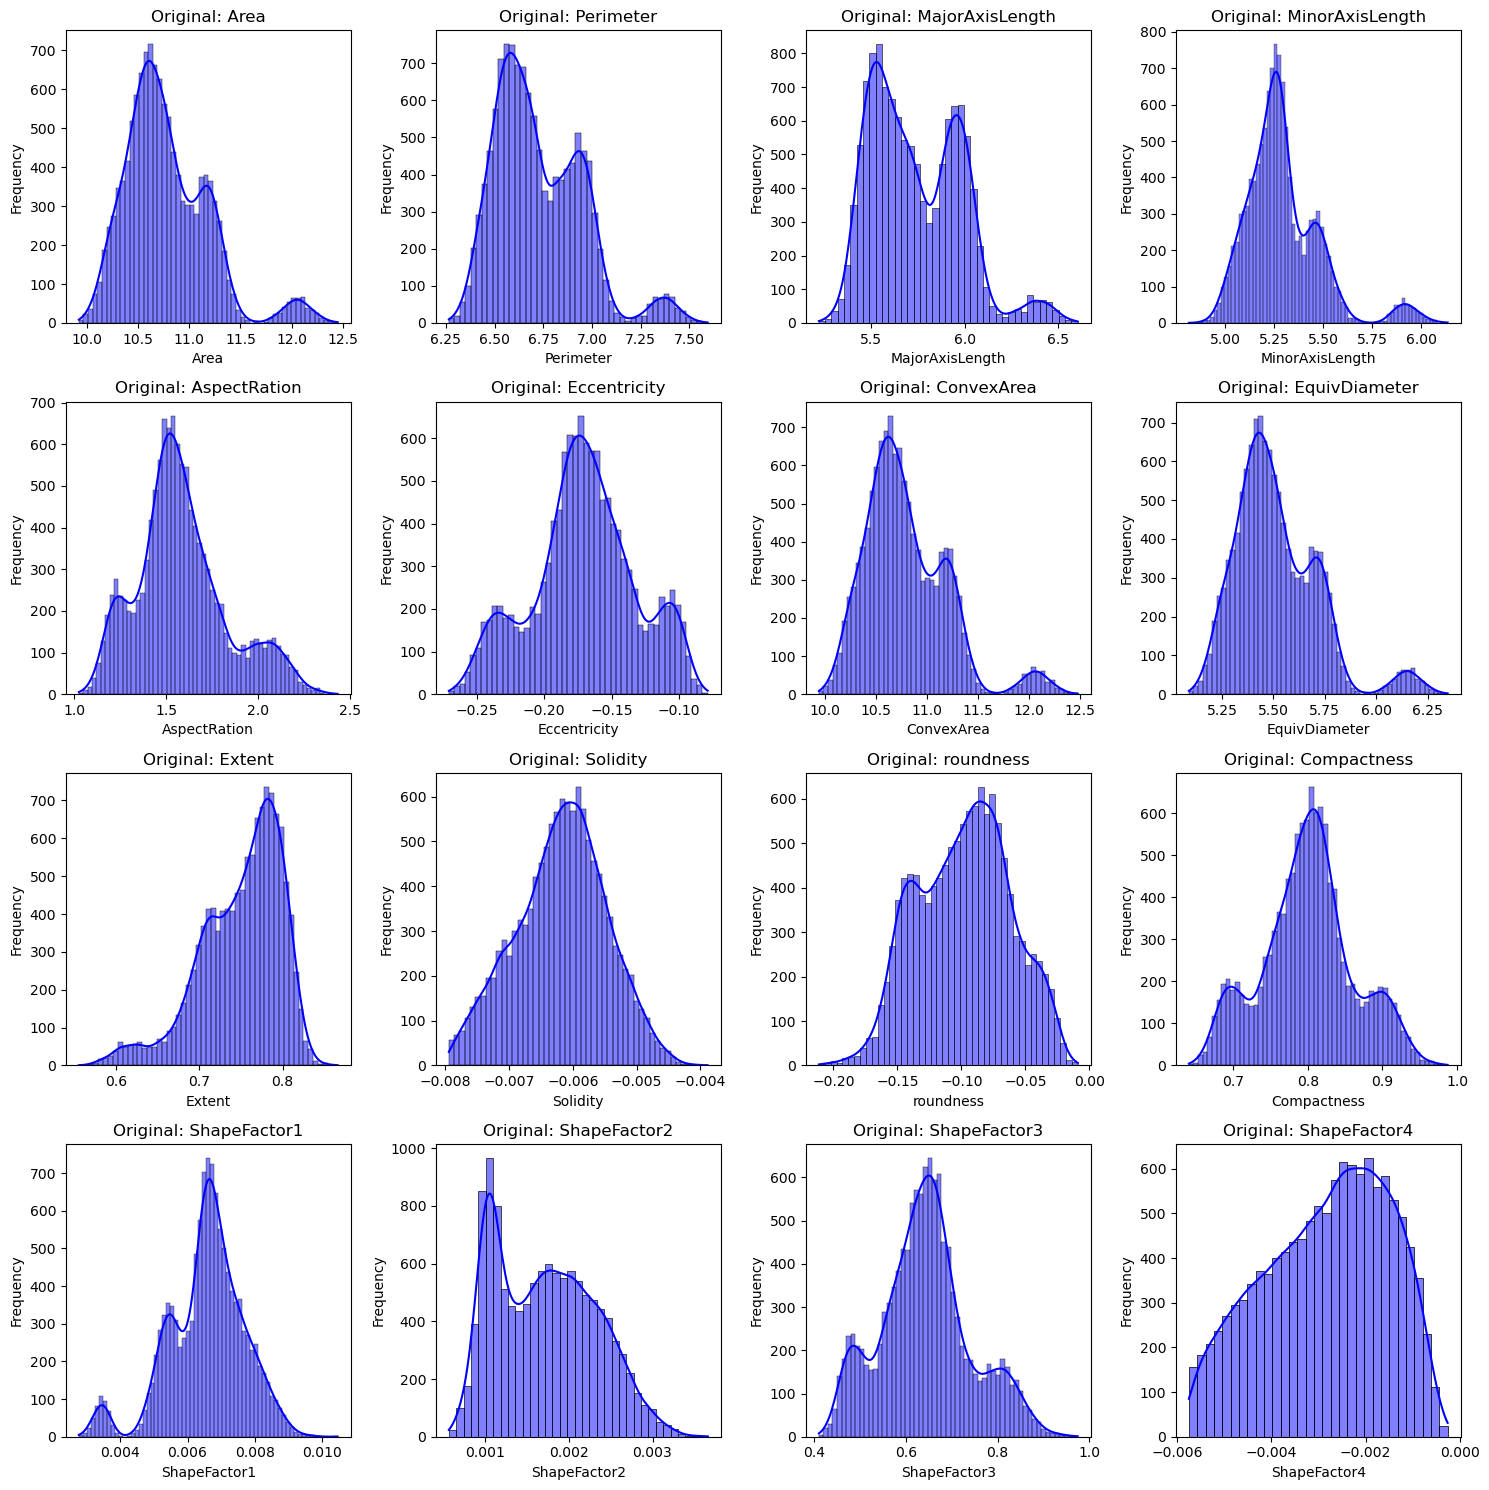

In [14]:
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Norm.columns):
    sns.histplot(X_train_Norm[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

create a class to iterate through all of the potential options for the different classifier methods

In [15]:
class ModelWithCV():
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {},\
                 scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
       
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
  
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  
        total_conf_matrix_train = np.zeros((2, 2))  

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
        
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            if self.scaler:
                cv_scaler= self.scaler
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            if self.smote_and_rand_und:
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            self.model.fit(X_train, y_train)
           
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            specificity_train = TN_train / (TN_train + FP_train) 
            specificity_scores_train.append(specificity_train)
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)

            #validation set
            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            specificity = TN / (TN + FP)  
            specificity_scores.append(specificity)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    

    def plot_avg_conf_matrix(self):
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()

# print logistic regression baseline model results

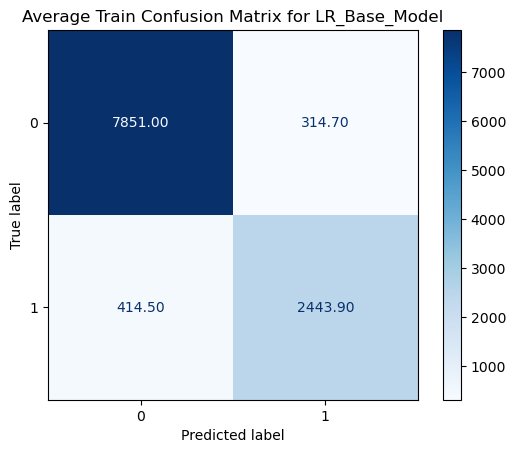

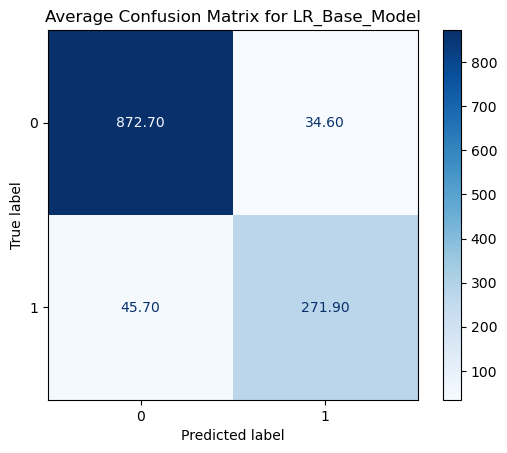

###TRAIN###
CV results for LR_Base_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_Base_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


(0.9618657383347337, 0.887693568491631, 0.8561286034561435, {}, False, False)

In [17]:
LR_Baseline_Results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'LR_Base_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

LR_Baseline_Results.plot_avg_conf_matrix()

LR_Baseline_Results.print_cv_summary()

## print decision tree baseline model results

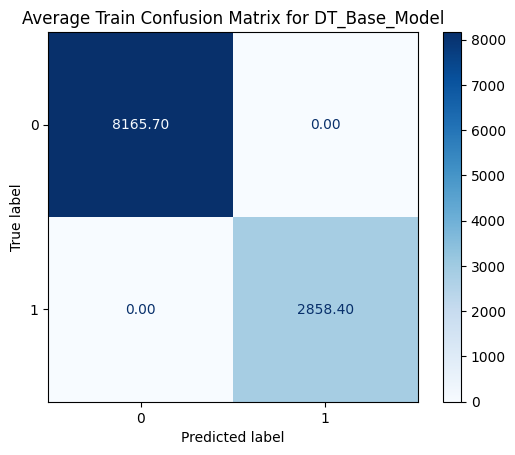

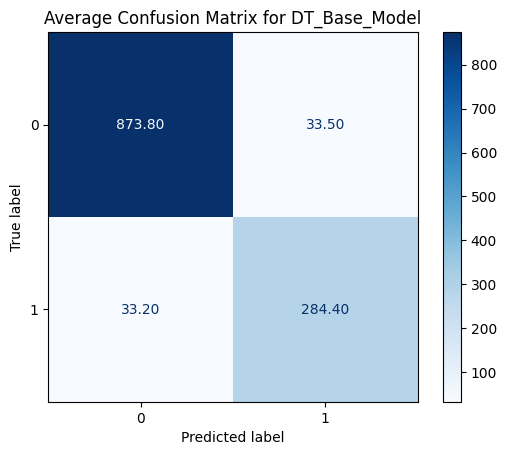

results for lr baseline:
###TRAIN###
CV results for LR_Base_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_Base_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613

results for dt baseline:
###TRAIN###
CV results for DT_Base_Model model:Average specificity: 1.00000
Average precision: 1.00000
Average recall: 1.00000
###VAL###
CV results for DT_Base_Model model:Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546


(0.9630782849010874, 0.8947636683015476, 0.8954595956589886, {}, False, False)

In [18]:
#instantiate the class
DT_Baseline_Results= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                    model_name= 'DT_Base_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

DT_Baseline_Results.plot_avg_conf_matrix()

print('results for lr baseline:')
LR_Baseline_Results.print_cv_summary()
print()
print('results for dt baseline:')
DT_Baseline_Results.print_cv_summary()

unline the logistic regression model, the current decision tree model is clearly overfitting to the training data, but the decision tree model's validation set is outperforming both the training and validation set of the logistic regression model.

lets run an optimization grid search on both of these models to see which of the two perform the best after being properly tuned to the dataset.

## tune logistic regression via grid search

In [29]:
lr_metric_tracker= []
lr_data_and_scaler= []

data_sets= [X_train, X_train_Norm]
C= [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000]
int_fit= [True, False]
solvers = ['liblinear', 'saga', 'lbfgs']
smote= [True, False]
scaler= [False, StandardScaler(), MinMaxScaler()]

for data, data_name in zip(data_sets, ["X_train", "X_train_Norm"]):
    for fit in int_fit:
        for sm in smote:
            for sc in scaler:        
                for c in C:
                    for solvera in solvers:
                        model_kwargs= {'C': c, 'solver': solvera, 'fit_intercept': fit, 'penalty': 'l2' }
                        print(model_kwargs)
                        #instantiate the class
                        temp= ModelWithCV(model_instantiator= LogisticRegression,
                                                            model_name= 'Tuned_LR_Model',
                                                            X= data,
                                                            y= y_train,
                                                            scaler= sc,
                                                            smote_and_rand_und= sm,
                                                            model_kwargs= model_kwargs
                                                           )
                        
                        lr_metric_tracker.append(temp.print_cv_summary())
                        lr_data_and_scaler.append((data_name, sc))
                        
                        print()
                        print('#### NEXT ITERATION###')

{'C': 0.01, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_LR_Model model:Average specificity: 0.90497
Average precision: 0.90604
Average recall: 0.91636
###VAL###
CV results for Tuned_LR_Model model:Average specificity: 0.90488
Average precision: 0.77102
Average recall: 0.91309

#### NEXT ITERATION###
{'C': 0.01, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_LR_Model model:Average specificity: 1.00000
Average precision: 1.00000
Average recall: 0.00451
###VAL###
CV results for Tuned_LR_Model model:Average specificity: 1.00000
Average precision: 0.90000
Average recall: 0.00441

#### NEXT ITERATION###
{'C': 0.01, 'solver': 'lbfgs', 'fit_intercept': True, 'penalty': 'l2'}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_LR_Model model:Average specificity: 0.92042
Average precision: 0.92142
Average recall: 

#test

In [41]:
pd.set_option('display.max_colwidth', None)

In [43]:
lr_metrics_df= pd.DataFrame(lr_metric_tracker)

lr_data_scaler_df= pd.DataFrame(lr_data_and_scaler)

lr_tuned_results_df = pd.merge(lr_metrics_df, lr_data_scaler_df, left_index=True, right_index=True)

print(len(lr_tuned_results_df))

lr_tuned_results_df.head()

864


0_x       1_x         2  \
0  0.904884  0.771019  0.913092   
1  1.000000  0.900000  0.004410   
2  0.920977  0.804871  0.929467   
3  0.904994  0.771190  0.912778   
4  1.000000  0.900000  0.004410   

                                                                            3  \
0  {'C': 0.01, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}   
1       {'C': 0.01, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}   
2      {'C': 0.01, 'solver': 'lbfgs', 'fit_intercept': True, 'penalty': 'l2'}   
3   {'C': 0.1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}   
4        {'C': 0.1, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}   

       4     5      0_y    1_y  
0  False  True  X_train  False  
1  False  True  X_train  False  
2  False  True  X_train  False  
3  False  True  X_train  False  
4  False  True  X_train  False

In [44]:

lr_new_col_names= ['v_avg_spec', 'v_avg_prec', 'v_avg_rec', 'v_hyp_para', 'scaler', 'v_SM_RU', 'normalized', 'scaled']

lr_tuned_results_df.columns= lr_new_col_names

lr_tuned_results_df.head()

v_avg_spec  v_avg_prec  v_avg_rec  \
0    0.904884    0.771019   0.913092   
1    1.000000    0.900000   0.004410   
2    0.920977    0.804871   0.929467   
3    0.904994    0.771190   0.912778   
4    1.000000    0.900000   0.004410   

                                                                   v_hyp_para  \
0  {'C': 0.01, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}   
1       {'C': 0.01, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}   
2      {'C': 0.01, 'solver': 'lbfgs', 'fit_intercept': True, 'penalty': 'l2'}   
3   {'C': 0.1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}   
4        {'C': 0.1, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}   

  scaler  v_SM_RU normalized scaled  
0  False     True    X_train  False  
1  False     True    X_train  False  
2  False     True    X_train  False  
3  False     True    X_train  False  
4  False     True    X_train  False

In [45]:
#sort by highest spec value
lr_tuned_grid_search_spec_sorted = lr_tuned_results_df.sort_values(\
    by=['v_avg_spec', 'v_avg_prec', 'v_avg_rec'], ascending=[False, False, False])

pd.set_option('display.max_rows', None)

lr_tuned_grid_search_spec_sorted

v_avg_spec  v_avg_prec  v_avg_rec  \
541    1.000000    1.000000   0.091947   
1      1.000000    0.900000   0.004410   
4      1.000000    0.900000   0.004410   
7      1.000000    0.900000   0.004410   
10     1.000000    0.900000   0.004410   
13     1.000000    0.900000   0.004410   
16     1.000000    0.900000   0.004410   
19     1.000000    0.900000   0.004410   
22     1.000000    0.900000   0.004410   
25     1.000000    0.900000   0.004410   
28     1.000000    0.900000   0.004410   
31     1.000000    0.900000   0.004410   
34     1.000000    0.900000   0.004410   
217    1.000000    0.900000   0.004410   
220    1.000000    0.900000   0.004410   
223    1.000000    0.900000   0.004410   
226    1.000000    0.900000   0.004410   
229    1.000000    0.900000   0.004410   
232    1.000000    0.900000   0.004410   
235    1.000000    0.900000   0.004410   
238    1.000000    0.900000   0.004410   
241    1.000000    0.900000   0.004410   
244    1.000000    0.900000   0.004410   
247    1.000000    0.900000   0.004410   
250    1.000000    0.900000   0.004410   
109    1.000000    0.000000   0.000000   
112    1.000000    0.000000   0.000000   
115    1.000000    0.000000   0.000000   
118    1.000000    0.000000   0.000000   
121    1.000000    0.000000   0.000000   
124    1.000000    0.000000   0.000000   
127    1.000000    0.000000   0.000000   
130    1.000000    0.000000   0.000000   
133    1.000000    0.000000   0.000000   
136    1.000000    0.000000   0.000000   
139    1.000000    0.000000   0.000000   
142    1.000000    0.000000   0.000000   
325    1.000000    0.000000   0.000000   
328    1.000000    0.000000   0.000000   
331    1.000000    0.000000   0.000000   
334    1.000000    0.000000   0.000000   
337    1.000000    0.000000   0.000000   
340    1.000000    0.000000   0.000000   
343    1.000000    0.000000   0.000000   
346    1.000000    0.000000   0.000000   
349    1.000000    0.000000   0.000000   
352    1.000000    0.000000   0.000000   
355    1.000000    0.000000   0.000000   
358    1.000000    0.000000   0.000000   
540    1.000000    0.000000   0.000000   
756    1.000000    0.000000   0.000000   
757    1.000000    0.000000   0.000000   
758    1.000000    0.000000   0.000000   
181    0.999008    0.993167   0.420649   
182    0.999008    0.993167   0.420649   
180    0.998567    0.990170   0.424426   
396    0.998236    0.988105   0.425371   
397    0.998236    0.988105   0.425371   
398    0.998236    0.988105   0.425371   
543    0.993056    0.876911   0.135706   
544    0.993056    0.952165   0.393874   
612    0.992175    0.962628   0.574302   
828    0.992175    0.962628   0.574302   
829    0.992175    0.962628   0.574302   
830    0.992175    0.962628   0.574302   
613    0.992064    0.962075   0.573987   
614    0.992064    0.962075   0.573987   
761    0.991954    0.726111   0.058569   
759    0.991954    0.725191   0.058253   
760    0.991954    0.722885   0.057625   
184    0.984791    0.947855   0.783696   
185    0.984791    0.947855   0.783696   
183    0.984790    0.947663   0.781495   
399    0.984459    0.946494   0.780238   
400    0.984459    0.946494   0.780238   
401    0.984459    0.946494   0.780238   
549    0.979831    0.933961   0.811720   
542    0.979279    0.922320   0.699623   
767    0.978949    0.927974   0.772675   
765    0.978949    0.927953   0.772675   
615    0.978949    0.929816   0.790623   
616    0.978949    0.930152   0.795029   
617    0.978838    0.929792   0.794714   
831    0.978508    0.928340   0.788731   
832    0.978508    0.928340   0.788731   
833    0.978508    0.928340   0.788731   
145    0.978398    0.932467   0.846975   
146    0.978398    0.932467   0.846975   
768    0.977076    0.929630   0.862088   
402    0.976966    0.929386   0.861462   
403    0.976966    0.929386   0.861462   
404    0.976855    0.929061   0.861462   
186    0.976855    0.928979   0.860518   
187    0.976745    0.928565   0.859885   
188    0.976745

In [48]:
#sort by highest prec
lr_tuned_grid_search_prec_sorted = lr_tuned_results_df.sort_values(\
    by=['v_avg_prec', 'v_avg_spec', 'v_avg_rec'], ascending=[False, False, False])

lr_tuned_grid_search_prec_sorted

v_avg_spec  v_avg_prec  v_avg_rec  \
541    1.000000    1.000000   0.091947   
181    0.999008    0.993167   0.420649   
182    0.999008    0.993167   0.420649   
180    0.998567    0.990170   0.424426   
396    0.998236    0.988105   0.425371   
397    0.998236    0.988105   0.425371   
398    0.998236    0.988105   0.425371   
612    0.992175    0.962628   0.574302   
828    0.992175    0.962628   0.574302   
829    0.992175    0.962628   0.574302   
830    0.992175    0.962628   0.574302   
613    0.992064    0.962075   0.573987   
614    0.992064    0.962075   0.573987   
544    0.993056    0.952165   0.393874   
184    0.984791    0.947855   0.783696   
185    0.984791    0.947855   0.783696   
183    0.984790    0.947663   0.781495   
399    0.984459    0.946494   0.780238   
400    0.984459    0.946494   0.780238   
401    0.984459    0.946494   0.780238   
549    0.979831    0.933961   0.811720   
145    0.978398    0.932467   0.846975   
146    0.978398    0.932467   0.846975   
616    0.978949    0.930152   0.795029   
615    0.978949    0.929816   0.790623   
617    0.978838    0.929792   0.794714   
768    0.977076    0.929630   0.862088   
402    0.976966    0.929386   0.861462   
403    0.976966    0.929386   0.861462   
404    0.976855    0.929061   0.861462   
186    0.976855    0.928979   0.860518   
552    0.976524    0.928953   0.874366   
187    0.976745    0.928565   0.859885   
188    0.976745    0.928565   0.859885   
841    0.975863    0.928405   0.890743   
831    0.978508    0.928340   0.788731   
832    0.978508    0.928340   0.788731   
833    0.978508    0.928340   0.788731   
767    0.978949    0.927974   0.772675   
765    0.978949    0.927953   0.772675   
863    0.975423    0.927893   0.899555   
847    0.975533    0.927688   0.892632   
850    0.975533    0.927672   0.892318   
853    0.975533    0.927672   0.892318   
856    0.975533    0.927672   0.892318   
859    0.975533    0.927672   0.892318   
862    0.975533    0.927672   0.892318   
844    0.975533    0.927661   0.892318   
846    0.975202    0.927503   0.902703   
148    0.975643    0.927463   0.885070   
149    0.975643    0.927463   0.885070   
623    0.975643    0.927315   0.884444   
857    0.975202    0.927260   0.899868   
861    0.974872    0.926924   0.907743   
622    0.975533    0.926914   0.882556   
851    0.974982    0.926778   0.900814   
770    0.976084    0.926663   0.861144   
848    0.974982    0.926632   0.898613   
147    0.975312    0.926565   0.885700   
625    0.975092    0.926472   0.892632   
621    0.975422    0.926393   0.880040   
860    0.974871    0.926351   0.899556   
858    0.974651    0.926306   0.907426   
561    0.974762    0.926236   0.900502   
405    0.974981    0.926172   0.891997   
406    0.974981    0.926172   0.891997   
407    0.974981    0.926172   0.891997   
573    0.974652    0.925983   0.901445   
852    0.974541    0.925970   0.907114   
564    0.974652    0.925956   0.901131   
567    0.974652    0.925956   0.901131   
570    0.974652    0.925956   0.901131   
854    0.974651    0.925901   0.900814   
558    0.974651    0.925859   0.900815   
189    0.974871    0.925788   0.891682   
190    0.974871    0.925762   0.891053   
200    0.974431    0.925759   0.907116   
843    0.974651    0.925756   0.899556   
209    0.974431    0.925747   0.907117   
644    0.974541    0.925731   0.902704   
151    0.974541    0.925720   0.901133   
845    0.974651    0.925719   0.898611   
560    0.974652    0.925664   0.898300   
840    0.974762    0.925649   0.893890   
842    0.974762    0.925628   0.893576   
193    0.974431    0.925626   0.903339   
582    0.974761    0.925617   0.893575   
628    0.974761    0.925602   0.893262   
584    0.974761    0.925598   0.893261   
777    0.974652    0.925594   0.897036   
583    0.974761    0.925569   0.892947   
780    0.974652    0.925565   0.896720   
783    0.974652    0.925565   0.896720   
786    0.974652    0.925565   0.896720   
789    0.974652

## print the optimized logistic regression model

In [ ]:
model_kwargs= {'C': c, 'solver': solvera, 'fit_intercept': fit, 'penalty': 'l2' }
                        print(model_kwargs)
                        #instantiate the class
                        temp= ModelWithCV(model_instantiator= LogisticRegression,
                                                            model_name= 'Tuned_LR_Model',
                                                            X= data,
                                                            y= y_train,
                                                            scaler= sc,
                                                            smote_and_rand_und= sm,
                                                            model_kwargs= model_kwargs
                                                           )

# tune decision tree via grid search 

In [52]:
range(1, X_train.shape[1])

range(1, 16)

In [ ]:
dt_metric_tracker= []
dt_data_and_scaler= []

data_sets= [X_train]
#computer couldn't handle iterating past the max depth of 1, max output was 5,370 iterations
#truncate depth range from 1-33 to 1-4
max_depths= list(range(1,33))
#change 10 steps down to 5
min_samples_splits = np.linspace(0.1, 1.0, 5, endpoint=True)
criterions = ['gini', 'entropy', 'log_loss']
#change 10 steps down to 5
min_samples_leafs = np.linspace(0.01, 0.5, 5, endpoint=True)
max_feature_num = list(range(1, X_train.shape[1]))
smote= [True, False]
scaler= [False]

for data, data_name in zip(data_sets, ["X_train", "X_train_Norm"]):
    for depth in max_depths:
        for sm in smote:
            for sc in scaler:        
                for fit in int_fit:
                    for samp_split in min_samples_splits:
                        for solver in solvers:
                            for crit in criterions:
                                for samp_leafs in min_samples_leafs:
                                    for num_feat in max_feature_num:
                                        model_kwargs= {'max_depth': depth, 'min_samples_split': samp_split, 
                                                        'criterion': crit, 'min_samples_leaf': samp_leafs, 
                                                        'max_features': num_feat}
                                        print(model_kwargs)
                                        #instantiate the class
                                        temp= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                                                            model_name= 'Tuned_DT_Model',
                                                                            X= data,
                                                                            y= y_train,
                                                                            scaler= sc,
                                                                            smote_and_rand_und= sm,
                                                                            model_kwargs= model_kwargs
                                                                           )
                                        
                                        dt_metric_tracker.append(temp.print_cv_summary())
                                        dt_data_and_scaler.append((data_name, sc))
                                        
                                        print()
                                        print('#### NEXT ITERATION###')

{'max_depth': 1, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 1}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.27635
Average precision: 0.56185
Average recall: 0.92781
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.27521
Average precision: 0.30506
Average recall: 0.90868

#### NEXT ITERATION###
{'max_depth': 1, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 2}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.69714
Average precision: 0.76082
Average recall: 0.96324
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.69657
Average precision: 0.52375
Average recall: 0.95151

#### NEXT ITERATION###
{'max_depth': 1, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 3}
SMOTEing and Randomly Undersampling
###TRAIN#

In [61]:
dt_metric_tracker= []
dt_data_and_scaler= []

data_sets= [X_train]
#computer couldn't handle iterating past the max depth of 1, max output was 5,370 iterations
#truncate depth range from 1-33 to 1-4
max_depths= [2]
#change 10 steps down to 5
min_samples_splits = np.linspace(0.1, 1.0, 5, endpoint=True)
criterions = ['gini', 'entropy', 'log_loss']
#change 10 steps down to 5
min_samples_leafs = np.linspace(0.01, 0.5, 5, endpoint=True)
max_feature_num = list(range(1, X_train.shape[1]))
smote= [True, False]
scaler= [False]

for data, data_name in zip(data_sets, ["X_train", "X_train_Norm"]):
    for depth in max_depths:
        for sm in smote:
            for sc in scaler:        
                for fit in int_fit:
                    for samp_split in min_samples_splits:
                        for solver in solvers:
                            for crit in criterions:
                                for samp_leafs in min_samples_leafs:
                                    for num_feat in max_feature_num:
                                        model_kwargs= {'max_depth': depth, 'min_samples_split': samp_split, 
                                                        'criterion': crit, 'min_samples_leaf': samp_leafs, 
                                                        'max_features': num_feat}
                                        print(model_kwargs)
                                        #instantiate the class
                                        temp= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                                                            model_name= 'Tuned_DT_Model',
                                                                            X= data,
                                                                            y= y_train,
                                                                            scaler= sc,
                                                                            smote_and_rand_und= sm,
                                                                            model_kwargs= model_kwargs
                                                                           )
                                        
                                        dt_metric_tracker.append(temp.print_cv_summary())
                                        dt_data_and_scaler.append((data_name, sc))
                                        
                                        print()
                                        print('#### NEXT ITERATION###')

{'max_depth': 2, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 1}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.80750
Average precision: 0.83014
Average recall: 0.93901
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.80590
Average precision: 0.62609
Average recall: 0.92568

#### NEXT ITERATION###
{'max_depth': 2, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 2}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.84506
Average precision: 0.86338
Average recall: 0.97895
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.84338
Average precision: 0.68370
Average recall: 0.96568

#### NEXT ITERATION###
{'max_depth': 2, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 3}
SMOTEing and Randomly Undersampling
###TRAIN#


KeyboardInterrupt



In [ ]:
dt_metric_tracker= []
dt_data_and_scaler= []

data_sets= [X_train]
#computer couldn't handle iterating past the max depth of 1, max output was 5,370 iterations
#truncate depth range from 1-33 to 1-4
max_depths= [3]
#change 10 steps down to 5
min_samples_splits = np.linspace(0.1, 1.0, 5, endpoint=True)
criterions = ['gini', 'entropy', 'log_loss']
#change 10 steps down to 5
min_samples_leafs = np.linspace(0.01, 0.5, 5, endpoint=True)
max_feature_num = list(range(1, X_train.shape[1]))
smote= [True, False]
scaler= [False]

for data, data_name in zip(data_sets, ["X_train"]):
    for depth in max_depths:
        for sm in smote:
            for sc in scaler:        
                for fit in int_fit:
                    for samp_split in min_samples_splits:
                        for solver in solvers:
                            for crit in criterions:
                                for samp_leafs in min_samples_leafs:
                                    for num_feat in max_feature_num:
                                        model_kwargs= {'max_depth': depth, 'min_samples_split': samp_split, 
                                                        'criterion': crit, 'min_samples_leaf': samp_leafs, 
                                                        'max_features': num_feat}
                                        print(model_kwargs)
                                        #instantiate the class
                                        temp= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                                                            model_name= 'Tuned_DT_Model',
                                                                            X= data,
                                                                            y= y_train,
                                                                            scaler= sc,
                                                                            smote_and_rand_und= sm,
                                                                            model_kwargs= model_kwargs
                                                                           )
                                        
                                        dt_metric_tracker.append(temp.print_cv_summary())
                                        dt_data_and_scaler.append((data_name, sc))
                                        
                                        print()
                                        print('#### NEXT ITERATION###')

{'max_depth': 3, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 1}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.51438
Average precision: 0.66566
Average recall: 0.96680
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.51383
Average precision: 0.40544
Average recall: 0.94614

#### NEXT ITERATION###
{'max_depth': 3, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 2}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.81165
Average precision: 0.84137
Average recall: 0.99029
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.80746
Average precision: 0.64564
Average recall: 0.98301

#### NEXT ITERATION###
{'max_depth': 3, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 3}
SMOTEing and Randomly Undersampling
###TRAIN#

In [ ]:
dt_metric_tracker= []
dt_data_and_scaler= []

data_sets= [X_train, X_train_Norm]
#computer couldn't handle iterating past the max depth of 1, max output was 5,370 iterations
#truncate depth range from 1-33 to 1-4
max_depths= [4]
#change 10 steps down to 5
min_samples_splits = np.linspace(0.1, 1.0, 5, endpoint=True)
criterions = ['gini', 'entropy', 'log_loss']
#change 10 steps down to 5
min_samples_leafs = np.linspace(0.01, 0.5, 5, endpoint=True)
max_feature_num = list(range(1, X_train.shape[1]))
smote= [True, False]
scaler= [False]

for data, data_name in zip(data_sets, ["X_train", "X_train_Norm"]):
    for depth in max_depths:
        for sm in smote:
            for sc in scaler:        
                for fit in int_fit:
                    for samp_split in min_samples_splits:
                        for solver in solvers:
                            for crit in criterions:
                                for samp_leafs in min_samples_leafs:
                                    for num_feat in max_feature_num:
                                        model_kwargs= {'max_depth': depth, 'min_samples_split': samp_split, 
                                                        'criterion': crit, 'min_samples_leaf': samp_leafs, 
                                                        'max_features': num_feat}
                                        print(model_kwargs)
                                        #instantiate the class
                                        temp= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                                                            model_name= 'Tuned_DT_Model',
                                                                            X= data,
                                                                            y= y_train,
                                                                            scaler= sc,
                                                                            smote_and_rand_und= sm,
                                                                            model_kwargs= model_kwargs
                                                                           )
                                        
                                        dt_metric_tracker.append(temp.print_cv_summary())
                                        dt_data_and_scaler.append((data_name, sc))
                                        
                                        print()
                                        print('#### NEXT ITERATION###')

{'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 1}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.87320
Average precision: 0.88495
Average recall: 0.97385
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.86785
Average precision: 0.71966
Average recall: 0.96094

#### NEXT ITERATION###
{'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 2}
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.92565
Average precision: 0.92779
Average recall: 0.95463
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.92516
Average precision: 0.81528
Average recall: 0.94143

#### NEXT ITERATION###
{'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 3}
SMOTEing and Randomly Undersampling
###TRAIN#

In [68]:
#huh

In [ ]:
#duh

In [ ]:
#pie in the 

In [69]:
dt_metrics_df= pd.DataFrame(dt_metric_tracker)

dt_data_scaler_df= pd.DataFrame(dt_data_and_scaler)

dt_tuned_results_df = pd.merge(dt_metrics_df, dt_data_scaler_df, left_index=True, right_index=True)

print(len(dt_tuned_results_df))

dt_new_col_names= ['v_avg_spec', 'v_avg_prec', 'v_avg_rec', 'v_hyp_para', 'scaler', 'v_SM_RU', 'normalized', 'scaled']

dt_tuned_results_df.columns= dt_new_col_names

dt_tuned_results_df.head()

3981


v_avg_spec  v_avg_prec  v_avg_rec  \
0    0.867848    0.719656   0.960942   
1    0.925164    0.815275   0.941431   
2    0.918440    0.808541   0.980165   
3    0.920313    0.811807   0.978278   
4    0.939823    0.849020   0.959066   

                                                                                                     v_hyp_para  \
0  {'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 1}   
1  {'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 2}   
2  {'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 3}   
3  {'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 4}   
4  {'max_depth': 4, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.01, 'max_features': 5}   

   scaler  v_SM_RU normalized  scaled  
0   False     True    X_train   False  
1   False     True    X_train   False  
2   False     True    X_train   False  
3   False     True    X_train   False  
4   False     True    X_train   False

In [70]:
#sort by highest prec
dt_tuned_grid_search_prec_sorted = dt_tuned_results_df.sort_values(\
    by=['v_avg_prec', 'v_avg_spec', 'v_avg_rec'], ascending=[False, False, False])

dt_tuned_grid_search_prec_sorted

v_avg_spec  v_avg_prec  v_avg_rec  \
18      0.983909    0.947625   0.825255   
243     0.983909    0.947625   0.825255   
468     0.983909    0.947625   0.825255   
693     0.983909    0.947625   0.825255   
918     0.983909    0.947625   0.825255   
1143    0.983909    0.947625   0.825255   
1367    0.983909    0.947625   0.825255   
1592    0.983909    0.947625   0.825255   
1817    0.983909    0.947625   0.825255   
3393    0.983909    0.947625   0.825255   
3618    0.983909    0.947625   0.825255   
3843    0.983909    0.947625   0.825255   
17      0.981043    0.938699   0.825579   
242     0.981043    0.938699   0.825579   
467     0.981043    0.938699   0.825579   
692     0.981043    0.938699   0.825579   
917     0.981043    0.938699   0.825579   
1142    0.981043    0.938699   0.825579   
1368    0.981043    0.938699   0.825579   
1593    0.981043    0.938699   0.825579   
1818    0.981043    0.938699   0.825579   
3392    0.981043    0.938699   0.825579   
3617    0.981043    0.938699   0.825579   
3842    0.981043    0.938699   0.825579   
93      0.978399    0.933355   0.846681   
168     0.978399    0.933355   0.846681   
318     0.978399    0.933355   0.846681   
393     0.978399    0.933355   0.846681   
543     0.978399    0.933355   0.846681   
618     0.978399    0.933355   0.846681   
768     0.978399    0.933355   0.846681   
843     0.978399    0.933355   0.846681   
993     0.978399    0.933355   0.846681   
1068    0.978399    0.933355   0.846681   
1218    0.978399    0.933355   0.846681   
1293    0.978399    0.933355   0.846681   
1442    0.978399    0.933355   0.846681   
1517    0.978399    0.933355   0.846681   
1667    0.978399    0.933355   0.846681   
1742    0.978399    0.933355   0.846681   
1892    0.978399    0.933355   0.846681   
1967    0.978399    0.933355   0.846681   
3468    0.978399    0.933355   0.846681   
3543    0.978399    0.933355   0.846681   
3693    0.978399    0.933355   0.846681   
3768    0.978399    0.933355   0.846681   
3918    0.978399    0.933355   0.846681   
92      0.974872    0.922948   0.845422   
167     0.974872    0.922948   0.845422   
317     0.974872    0.922948   0.845422   
392     0.974872    0.922948   0.845422   
542     0.974872    0.922948   0.845422   
617     0.974872    0.922948   0.845422   
767     0.974872    0.922948   0.845422   
842     0.974872    0.922948   0.845422   
992     0.974872    0.922948   0.845422   
1067    0.974872    0.922948   0.845422   
1217    0.974872    0.922948   0.845422   
1292    0.974872    0.922948   0.845422   
1443    0.974872    0.922948   0.845422   
1518    0.974872    0.922948   0.845422   
1668    0.974872    0.922948   0.845422   
1743    0.974872    0.922948   0.845422   
1893    0.974872    0.922948   0.845422   
1968    0.974872    0.922948   0.845422   
3467    0.974872    0.922948   0.845422   
3542    0.974872    0.922948   0.845422   
3692    0.974872    0.922948   0.845422   
3767    0.974872    0.922948   0.845422   
3917    0.974872    0.922948   0.845422   
29      0.973107    0.915611   0.832495   
254     0.973107    0.915611   0.832495   
479     0.973107    0.915611   0.832495   
704     0.973107    0.915611   0.832495   
929     0.973107    0.915611   0.832495   
1154    0.973107    0.915611   0.832495   
1379    0.973107    0.915611   0.832495   
1604    0.973107    0.915611   0.832495   
1829    0.973107    0.915611   0.832495   
3404    0.973107    0.915611   0.832495   
3629    0.973107    0.915611   0.832495   
3854    0.973107    0.915611   0.832495   
20      0.969913    0.911816   0.884132   
245     0.969913    0.911816   0.884132   
470     0.969913    0.911816   0.884132   
695     0.969913    0.911816   0.884132   
920     0.969913    0.911816   0.884132   
1145    0.969913    0.911816   0.884132   
1370    0.969913    0.911816   0.884132   
1595    0.969913    0.911816   0.884132   
1820    0.969913    0.911816   0.884132   
3395    0.969913    0.911816   0.884132   
3620   

## pick the final most effective model

# run the final model on the test data

In [ ]:
final_model= dt_SR_Tuned_A

#Smote and Randomly undersample the training data
X_train_SR, y_train_SR= Smote_and_RandUndS(X_train, y_train)

final_model.fit(X_train_SR, y_train_SR)

In [ ]:
class Model_with_final():
    def __init__(self, model, model_name, X_train, y_train, X_test, y_test):
        self.model = model
        self.name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.final_results = None
        self.final_accuracy = None
        self.final_specificity = None
        self.final_precision = None
        self.final_recall = None
        self.final_conf_matrix = None
        
        # Train the model and make predictions on the final test set
        self.train_and_evaluate()

    def train_and_evaluate(self):
        """
        Train the model on the training data and evaluate on the test data.
        """
        # Train the model on the training data
        self.model.fit(self.X_train, self.y_train)
        
        # Predict on the test data
        y_pred = self.model.predict(self.X_test)
        
        # Compute performance metrics on the test set
        self.final_accuracy = accuracy_score(self.y_test, y_pred)
        
        # Compute the confusion matrix
        self.final_conf_matrix = confusion_matrix(self.y_test, y_pred)
        
        # Compute specificity (TN / (TN + FP))
        TN, FP, FN, TP = self.final_conf_matrix.ravel()
        self.final_specificity = TN / (TN + FP)
        
        # Compute precision and recall
        self.final_precision = precision_score(self.y_test, y_pred)
        self.final_recall = recall_score(self.y_test, y_pred)
        
        self.final_results = {
            'Accuracy': self.final_accuracy,
            'Specificity': self.final_specificity,
            'Precision': self.final_precision,
            'Recall': self.final_recall
        }

    def print_final_summary(self):
        """
        Print the final results (accuracy, specificity, precision, recall).
        """
        print(f"Final results for {self.name} model on X_test:")
        print(f"Accuracy: {self.final_accuracy:.5f}")
        print(f"Specificity: {self.final_specificity:.5f}")
        print(f"Precision: {self.final_precision:.5f}")
        print(f"Recall: {self.final_recall:.5f}")

    def plot_conf_matrix(self):
        """
        Plot the confusion matrix using ConfusionMatrixDisplay.
        """
        if self.final_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.final_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Confusion Matrix for {self.name} on X_test")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run model evaluation first.")
            

In [ ]:
#instantiate the class
Final_Model_Results= Model_with_final(model= dt_SR_Tuned_A,
                                    model_name= 'Final_Model: Smoted/Randomly Undersampled and Tuned Decision Tree model',
                                    X_train = X_train_SR,
                                    y_train = y_train_SR,
                                     X_test = X_test,
                                     y_test = y_test)
Final_Model_Results.plot_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
Dt_SR_model_results.print_cv_summary()
Final_Model_Results.print_final_summary()